In [38]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [40]:
import csv
import os

# Get the current working directory
cwd = os.getcwd()

# Get the name of the CSV file
csv_file_name = "nilai_mapel.csv"

# Open the CSV file
with open(os.path.join(cwd, csv_file_name), "r") as csvfile:

    # Create a CSV reader object
    reader = csv.reader(csvfile)

    # Read the data from the CSV file
    data = []
    for row in reader:
        data.append(row)

# Print the data
print(data)

[['Matematika', 'Bahasa Indonesia', 'IPA', 'IPS', 'Bahasa Inggris', 'Penjaskes', 'Seni Budaya', 'OUTPUT'], ['77', '65', '82', '93', '74', '70', '70', 'Interpersonal'], ['89', '77', '90', '82', '85', '70', '77', 'Logika'], ['83', '90', '80', '64', '92', '80', '70', 'Verbal'], ['84', '96', '85', '67', '97', '80', '80', 'Verbal'], ['75', '92', '80', '72', '91', '80', '82', 'Verbal'], ['77', '80', '81', '66', '75', '70', '90', 'Musik'], ['83', '61', '85', '98', '68', '85', '78', 'Interpersonal'], ['67', '74', '87', '75', '50', '90', '65', 'Kinestetik'], ['88', '70', '89', '79', '62', '80', '67', 'Logika'], ['76', '71', '98', '67', '70', '60', '70', 'Naturalis'], ['80', '68', '80', '73', '75', '95', '83', 'Kinestetik'], ['80', '93', '83', '70', '90', '75', '70', 'Verbal'], ['82', '64', '76', '98', '75', '85', '75', 'Interpersonal'], ['92', '80', '90', '85', '76', '65', '77', 'Logika'], ['90', '65', '95', '72', '60', '80', '77', 'Logika'], ['78', '98', '82', '83', '92', '80', '76', 'Verbal']

In [41]:
x = df.iloc[:,0:7].values
y = df.iloc[:,7].values

print(x[0:5])
print(y[0:5])

[[77 65 82 93 74 70 70]
 [89 77 90 82 85 70 77]
 [83 90 80 64 92 80 70]
 [84 96 85 67 97 80 80]
 [75 92 80 72 91 80 82]]
['Interpersonal' 'Logika' 'Verbal' 'Verbal' 'Verbal']


In [42]:
#Check the number of rows in x and y
print('The number of data in x:',len(x))
print('The number of data in x:',len(y))

The number of data in x: 100
The number of data in x: 100


In [43]:
print(x.shape)
print(y.shape)


(100, 7)
(100,)


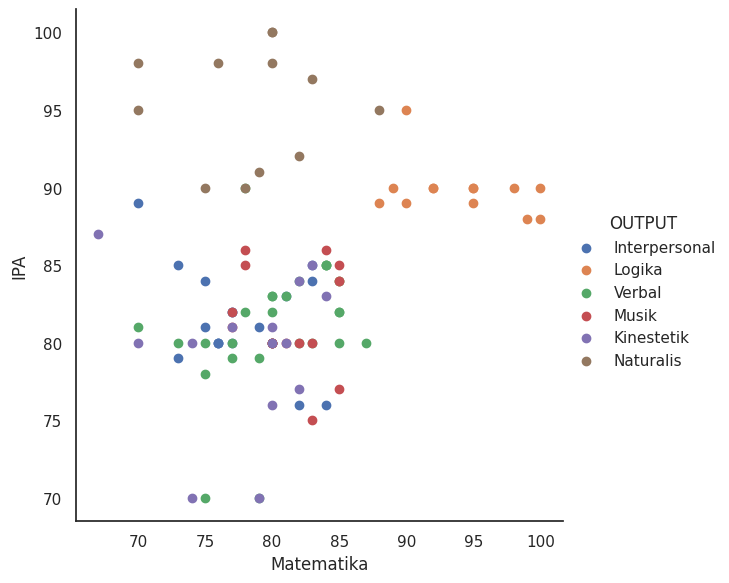

In [ ]:
sns.FacetGrid(df, hue="OUTPUT", height=6).map(plt.scatter,"Matematika", "IPA").add_legend()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)


In [ ]:
print(y1)

[0 2 5 5 5 3 0 1 2 4 1 5 0 2 2 5 4 5 1 0 5 0 3 3 2 0 0 1 1 3 3 2 3 5 2 2 1
 5 2 5 4 0 1 4 0 3 5 3 1 4 5 3 4 5 3 4 0 1 2 4 1 5 5 5 1 0 5 4 3 5 0 1 0 5
 5 0 3 5 2 0 2 0 5 4 3 1 2 0 3 0 5 5 5 1 2 5 4 4 3 5]


In [ ]:
y = pd.get_dummies(y1).values
print(y[0:5])

[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split into training,  validation, adn test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1765, random_state=42)
print(x_train[0:5])

[[82 64 76 98 75 85 75]
 [90 66 89 77 60 79 79]
 [88 72 95 70 62 80 80]
 [85 80 84 75 81 80 95]
 [70 72 89 94 69 60 77]]


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2765, random_state=42)
print(x_train[0:5])

[[76 71 98 67 70 60 70]
 [77 76 80 96 67 80 75]
 [80 93 83 70 90 75 70]
 [77 73 82 66 74 80 97]
 [82 81 77 83 74 90 85]]


In [ ]:
print(y_train[0:5])

[[0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]]


In [ ]:
print(x_val[0:5])
print(y_val[0:5])

[[ 80  79 100  90  81  70  80]
 [ 81  96  83  80  97  70  80]
 [ 81  78  83  99  80  80  70]
 [ 80  77  80  63  70  80  90]
 [ 77  72  82 100  75  80  85]]
[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]]


In [ ]:
# Set the global random seed
tf.random.set_seed(1234)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
  ])
model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))


Epoch 1/100
3/3 [==============================] - 0s 41ms/step - loss: 0.1961 - accuracy: 0.9306 - val_loss: 0.6126 - val_accuracy: 0.8214
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2890 - accuracy: 0.9028 - val_loss: 0.4059 - val_accuracy: 0.8571
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1424 - accuracy: 0.9583 - val_loss: 0.4622 - val_accuracy: 0.8571
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1443 - accuracy: 0.9722 - val_loss: 0.5048 - val_accuracy: 0.8571
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.2242 - accuracy: 0.8889 - val_loss: 0.5342 - val_accuracy: 0.8929
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3187 - accuracy: 0.8611 - val_loss: 0.4204 - val_accuracy: 0.8214
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1721 - accuracy: 0.9722 - val_loss: 0.5955 - val_accuracy: 0.7857
Epoch 8/100
3/3 [===

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,790
Trainable params: 2,790
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.26953616738319397
Test accuracy: 0.8928571343421936


In [ ]:
# Mendapatkan riwayat training_loss
train_loss = history.history['loss']

In [ ]:
# Mendapatkan riwayat validation_loss
val_loss = history.history['val_loss']

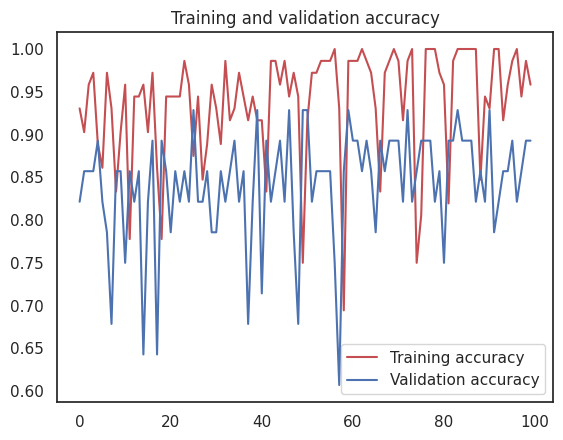

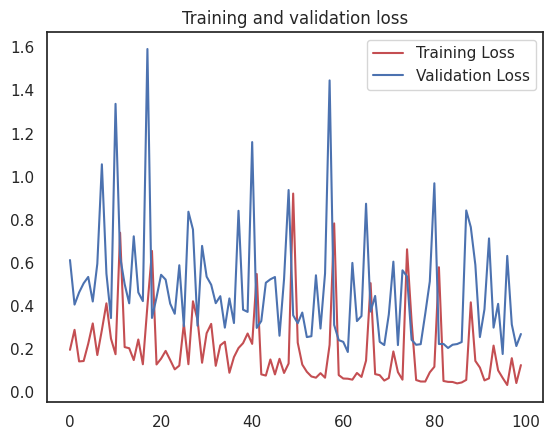

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(x_val)
y_pred

1/1 [==============================] - 0s 103ms/step


array([[2.52115045e-04, 3.22011516e-07, 1.78030459e-04, 3.32775526e-05,
        9.99373138e-01, 1.63097822e-04],
       [3.13631353e-05, 1.68176175e-05, 1.44561081e-05, 2.11994738e-05,
        5.59875048e-07, 9.99915540e-01],
       [9.99467731e-01, 7.83004507e-05, 3.91281264e-06, 1.04707087e-09,
        1.43411182e-06, 4.48628882e-04],
       [1.38374435e-05, 6.27837842e-03, 1.79311808e-03, 9.47712243e-01,
        4.08630557e-02, 3.33933206e-03],
       [9.99810457e-01, 8.76329796e-06, 7.75703143e-07, 9.04343196e-08,
        1.52256864e-04, 2.76812971e-05],
       [5.43602528e-06, 4.82123258e-04, 3.20123036e-05, 2.50050944e-05,
        8.24767898e-09, 9.99455333e-01],
       [1.07572377e-02, 1.94938912e-04, 1.90376770e-03, 6.22353196e-01,
        2.14128822e-01, 1.50662035e-01],
       [1.76095014e-07, 8.66053324e-06, 8.38291407e-01, 2.79124565e-02,
        1.33710966e-01, 7.62661730e-05],
       [8.82774591e-04, 9.89996731e-01, 1.29510110e-04, 5.45151578e-03,
        2.99756601e-03, 

In [ ]:
actual = np.argmax(y_val,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predict ed: {predicted}")

Actual: [4 5 0 3 0 5 3 2 1 0 1 3 5 5 5 5 3 5 0 2 4 3 0 1 5 5 4 4]
Predict ed: [4 5 0 3 0 5 3 2 1 0 1 4 5 5 5 5 3 5 0 4 4 3 4 1 5 5 4 4]


In [ ]:
#EVALUASI MODEL
import sklearn.metrics
# Check the accuracy score on the test set
print('Accuracy:', sklearn.metrics.accuracy_score(actual, predicted))

# Check the precision score on the test set
print('Precision:', sklearn.metrics.precision_score(actual, predicted, average='weighted'))

# Check the recall score on the test set
print('Recall:', sklearn.metrics.recall_score(actual, predicted, average='weighted'))

# Check the f1 score on the test set
print('F1:', sklearn.metrics.f1_score(actual, predicted, average='weighted'))

Accuracy: 0.9642857142857143
Precision: 0.9761904761904763
Recall: 0.9642857142857143
F1: 0.9658730158730159


In [ ]:
#menyimpan model
from google.colab import files
model.save('model.h5')